In [5]:
import numpy as np
import pandas as pd 
import string
import spacy # language models
nlp = spacy.load("en_core_web_sm")

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [6]:
import pandas
book=pd.read_csv("C:/Users/SUSHIL/Desktop/n95mask.csv",error_bad_lines=False,encoding='cp1252')

In [7]:
book

,Text
0,I went to reorder section to purchase this mas...
1,These masks are really awesome.. its thread is...
2,"Best Item , these N95 are of perfect quality a..."
3,"Same to same as shown in image , coverage of t..."
4,Excellent quality... And interesting thing is ...
5,Gd quality mask on its category.u can go for i...
6,perfect size that fits to all
7,It contains 10 packet with perfectly packed
8,Every pieces was perfect that is no defect
9,In market it's one pieces is high so value for...


In [8]:
from afinn import Afinn
afn=Afinn()

In [9]:
afinn = pd.read_csv('C:/Users/SUSHIL/Downloads/Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [10]:
afinn

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [11]:
import re  #regular expression
import string

In [12]:
def clean_data(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]','', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda Text: clean_data(Text)

In [13]:
book['Text'] = book.Text.apply(clean)

In [14]:
book['Text']

0     i went to reorder section to purchase this mas...
1     these masks are really awesome its thread is a...
2     best item  these  are of perfect quality at ve...
3     same to same as shown in image  coverage of th...
4     excellent quality and interesting thing is i g...
5     gd quality mask on its categoryu can go for it...
6                         perfect size that fits to all
7             it contains  packet with perfectly packed
8            every pieces was perfect that is no defect
9     in market its one pieces is high so value for ...
10    all masks are of same size and are very comfor...
11                                       and super safe
12    have ordered this product multiple times recei...
13    very nice product i loved it it is suitable fo...
14       recived only  mask actual order was your  mask
15    i re order the mask assuming the quality would...
16                             only got  pieces of mask
17    very very good product send by flipkart th

In [16]:
book = [Text.strip() for Text in book.Text]

In [18]:
book = [Text for Text in book if Text]

In [19]:
book[0:10]

['i went to reorder section to purchase this mask that i last purchased back in october  i thought that only the price has dropped somehow i even compared the names and found that both are same i got this today and turns out to be a complete disappointment the quality of the material used is much bad they even changed the structure of the support and it is much uglier i feel that the surgical mask is even better substitute than this one quite a big disappointment',
 'these masks are really awesome its thread is attached properly and nose clip thing is greaton top of thatit is quite soft as well i wear specs on top of mask and it did not create any fogging thereso pretty good',
 'best item  these  are of perfect quality at very less prices  it would recommend these masks to everyone here who are looking to protect them in these pandemic  all masks are of top quality and are washable',
 'same to same as shown in image  coverage of these  is amazing and very comfortable to wear worth my e

In [20]:
book1 = ' '.join(book)
book1

'i went to reorder section to purchase this mask that i last purchased back in october  i thought that only the price has dropped somehow i even compared the names and found that both are same i got this today and turns out to be a complete disappointment the quality of the material used is much bad they even changed the structure of the support and it is much uglier i feel that the surgical mask is even better substitute than this one quite a big disappointment these masks are really awesome its thread is attached properly and nose clip thing is greaton top of thatit is quite soft as well i wear specs on top of mask and it did not create any fogging thereso pretty good best item  these  are of perfect quality at very less prices  it would recommend these masks to everyone here who are looking to protect them in these pandemic  all masks are of top quality and are washable same to same as shown in image  coverage of these  is amazing and very comfortable to wear worth my each and every

In [25]:
nlp = spacy.load('en_core_web_sm')

book2 = nlp(book1)
spacy.displacy.render(book2,style='ent',jupyter=True)

In [26]:
for token in book2[0:50]:
  print(token,token.pos_)

i PRON
went VERB
to ADP
reorder NOUN
section NOUN
to PART
purchase VERB
this DET
mask NOUN
that DET
i PRON
last ADV
purchased VERB
back ADV
in ADP
october NOUN
  SPACE
i PRON
thought VERB
that SCONJ
only ADV
the DET
price NOUN
has AUX
dropped VERB
somehow ADV
i PRON
even ADV
compared VERB
the DET
names NOUN
and CCONJ
found VERB
that SCONJ
both DET
are AUX
same ADJ
i PRON
got VERB
this DET
today NOUN
and CCONJ
turns VERB
out ADP
to PART
be VERB
a DET
complete ADJ
disappointment NOUN
the DET


In [27]:
noun_vrbs = [token.text for token in book2 if token.pos_ in ('NOUN','VERB')]
print(noun_vrbs[0:20])

['went', 'reorder', 'section', 'purchase', 'mask', 'purchased', 'october', 'thought', 'price', 'dropped', 'compared', 'names', 'found', 'got', 'today', 'turns', 'be', 'disappointment', 'quality', 'material']


In [28]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [31]:
X = cv.fit_transform(noun_vrbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda Text: Text[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:10]

,word,count
0,mask,15
1,quality,11
2,is,8
3,masks,8
4,are,6
5,product,6
6,wear,4
7,got,3
8,be,3
9,thing,3


<AxesSubplot:title={'center':'Top Nouns and Verbs'}, xlabel='word'>

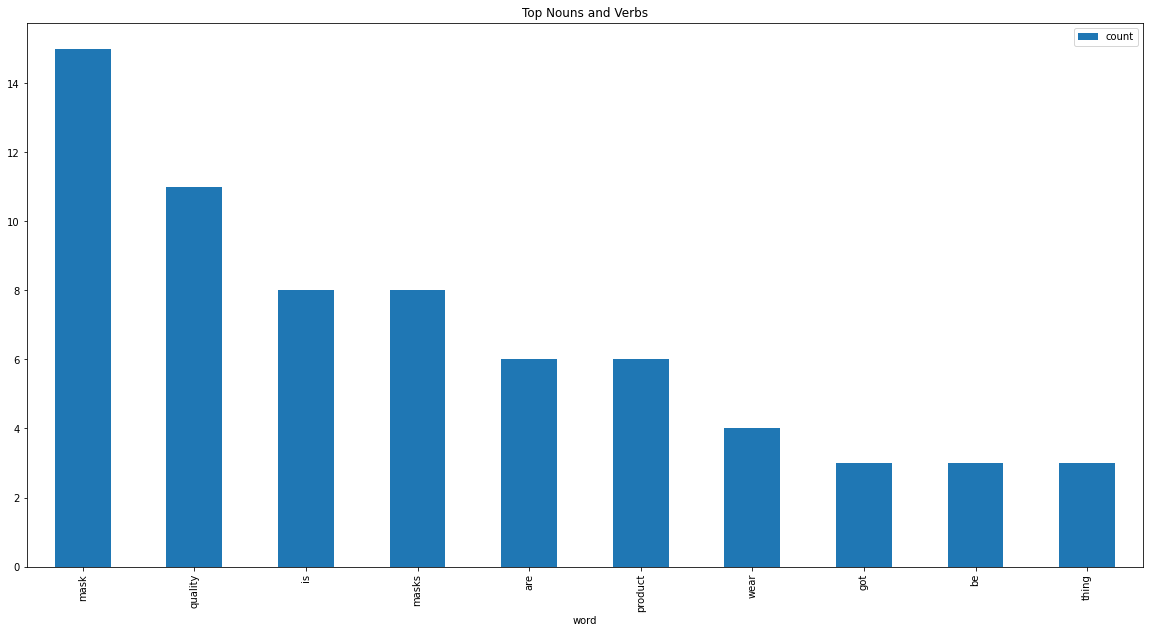

In [30]:
wf_df[0:10].plot.bar(x='word', figsize=(20,10), title='Top Nouns and Verbs')

In [46]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

import pandas
book=pd.read_csv("C:/Users/SUSHIL/Desktop/n95mask.csv",error_bad_lines=False,encoding='cp1252')
book = [Text.strip() for Text in book.Text] # remove both the leading and the trailing characters
book = [Text for Text in book if Text] # removes empty strings, because they are considered in Python as False

In [47]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(book))
sentences[:10]

['I went to reorder section to purchase this mask that I last purchased back in October 2020.',
 'I thought that only the price has dropped somehow.',
 'I even compared the names and found that both are same.',
 'I got this today and turns out to be a complete disappointment.',
 'The quality of the material used is much bad.',
 'They even changed the structure of the support and it is much uglier.',
 'I feel that the surgical mask is even better substitute than this one.',
 'Quite a big disappointment.',
 'These masks are really awesome.. its thread is attached properly and nose clip thing is great..on top of that,it is quite soft as well.',
 'I wear specs on top of mask, and it did not create any fogging there.so pretty good Best Item , these N95 are of perfect quality at very less prices , It would recommend these Masks to everyone here who are looking to protect them in these Pandemic .']

In [48]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,I went to reorder section to purchase this mas...
1,I thought that only the price has dropped some...
2,I even compared the names and found that both ...
3,I got this today and turns out to be a complet...
4,The quality of the material used is much bad.
5,They even changed the structure of the support...
6,I feel that the surgical mask is even better s...
7,Quite a big disappointment.
8,These masks are really awesome.. its thread is...
9,"I wear specs on top of mask, and it did not cr..."


In [49]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [50]:
nlp = spacy.load("en_core_web_sm")
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [51]:
calculate_sentiment(text = 'loved')

3

In [52]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [53]:
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0    17
1     9
2    11
3    12
4     9
5    13
6    13
7     4
8    24
9    49
Name: word_count, dtype: int64

In [54]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
6,I feel that the surgical mask is even better s...,0,13
5,They even changed the structure of the support...,2,13
17,The mask appear to be of good quality compared...,5,25
11,"Same to same as shown in image , coverage of t...",6,19
13,perfect size that fits to all It contains 10 p...,6,32
14,All masks are of same size and are very comfor...,8,35
8,These masks are really awesome.. its thread is...,9,24
12,Worth my each and every penny Excellent qualit...,11,47
9,"I wear specs on top of mask, and it did not cr...",12,49
18,Very nice product I loved it it is suitable fo...,12,141


In [24]:
sent_df['sentiment_value'].describe()

count    19.000000
mean      3.210526
std       5.180937
min      -3.000000
25%      -0.500000
50%       0.000000
75%       7.000000
max      12.000000
Name: sentiment_value, dtype: float64

In [25]:
sent_df[sent_df['sentiment_value']<=0].head()

,sentence,sentiment_value,word_count
0,I went to reorder section to purchase this mas...,0,17
1,I thought that only the price has dropped some...,-1,9
2,I even compared the names and found that both ...,0,11
3,I got this today and turns out to be a complet...,-2,12
4,The quality of the material used is much bad.,-3,9


In [26]:
sent_df['index']=range(0,len(sent_df))

In [57]:
sent_df[sent_df['sentiment_value'] >=10]

,sentence,sentiment_value,word_count
9,"I wear specs on top of mask, and it did not cr...",12,49
12,Worth my each and every penny Excellent qualit...,11,47
18,Very nice product I loved it it is suitable fo...,12,141


In [58]:
sent_df[sent_df['sentiment_value'] <=10]

,sentence,sentiment_value,word_count
0,I went to reorder section to purchase this mas...,0,17
1,I thought that only the price has dropped some...,-1,9
2,I even compared the names and found that both ...,0,11
3,I got this today and turns out to be a complet...,-2,12
4,The quality of the material used is much bad.,-3,9
5,They even changed the structure of the support...,2,13
6,I feel that the surgical mask is even better s...,0,13
7,Quite a big disappointment.,-1,4
8,These masks are really awesome.. its thread is...,9,24
10,All masks are of Top Quality and are washable.,0,9


C:\Users\SUSHIL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

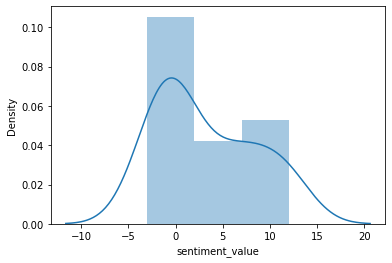

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

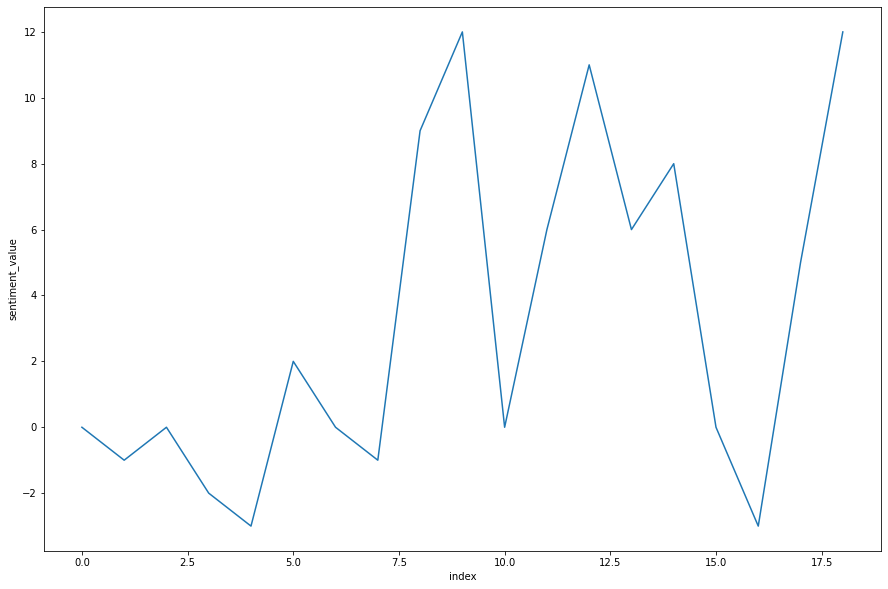

In [28]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

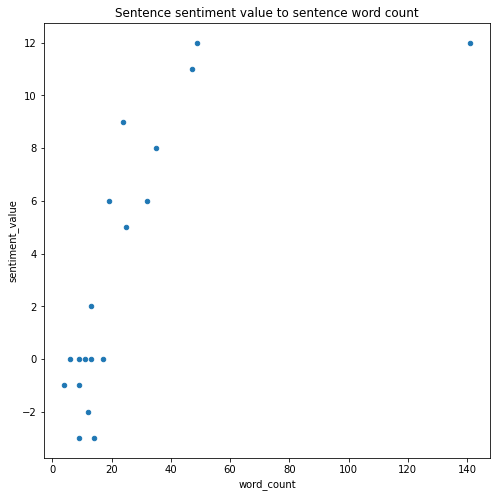

In [29]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')

In [59]:
string_total= " ".join(book)

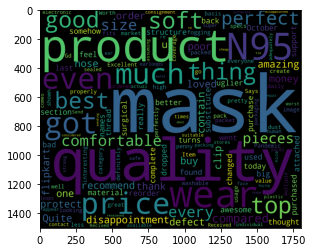

In [60]:
from wordcloud import WordCloud
wordcloud_stw = WordCloud(
                background_color= 'black',
                width = 1800,
                height = 1500
                ).generate(string_total)
plt.imshow(wordcloud_stw)